In [2]:
#Importing useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from copy import deepcopy
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from warnings import filterwarnings
filterwarnings(action = 'ignore')
%matplotlib inline

In [5]:
raw = pd.read_csv('surveyofbodyfat.csv')
df = deepcopy(raw)

In [15]:
#Features with above +-0.5 of correlation coefficient affect the most
df.corr()['BodyFat'].to_frame().sort_values(by='BodyFat', ascending=False).iloc[1:].T

,Abdomen,Chest,Hip,Weight,Thigh,Knee,Biceps,Neck,Forearm,Wrist,Age,Ankle,Height,Density
BodyFat,0.813432,0.70262,0.625201,0.612414,0.559608,0.508665,0.493271,0.490592,0.361387,0.346575,0.291458,0.26597,-0.089495,-0.987782


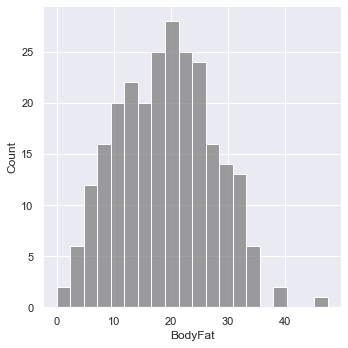

In [20]:
sns.displot(df['BodyFat'], bins=20, color='grey')
plt.show()

In [21]:
def normality_visual(data):
    for column in data.columns:
        fig = qqplot(data[column], line = '45', fit=True)
        ax = plt.gca() 
        fig.set_size_inches(15, 8) 
        ax.set_xlabel('Theoretical Quantiles', fontsize=13)
        ax.set_ylabel(f'Sample Quantiles of the {column} column', fontsize=13)
        plt.show()

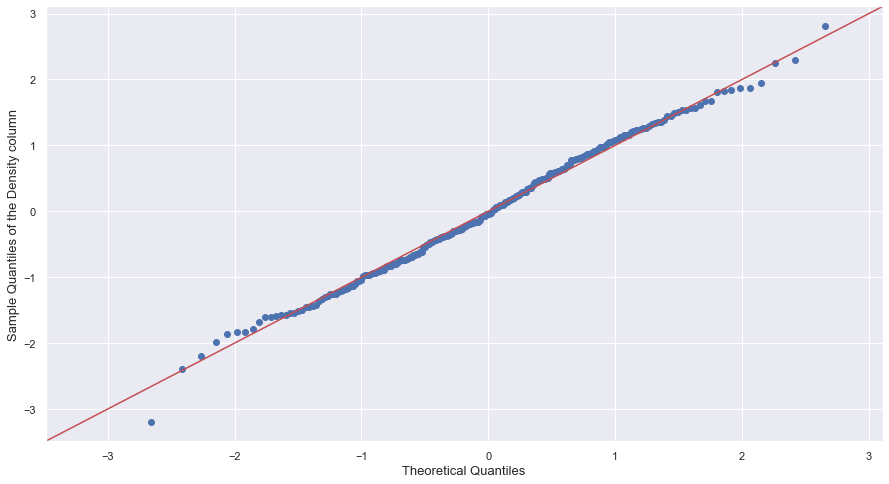

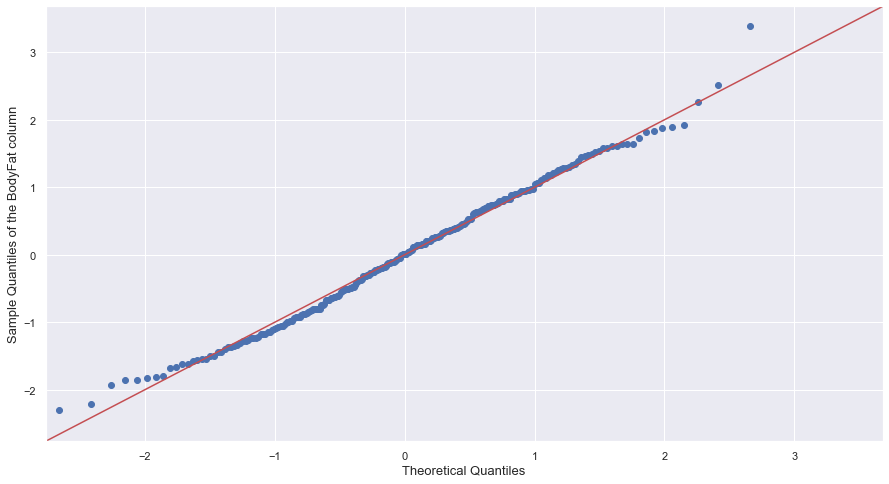

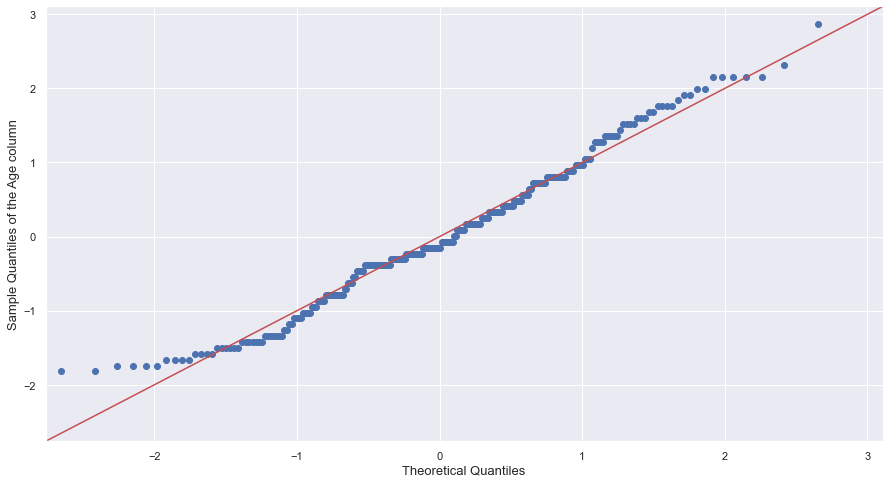

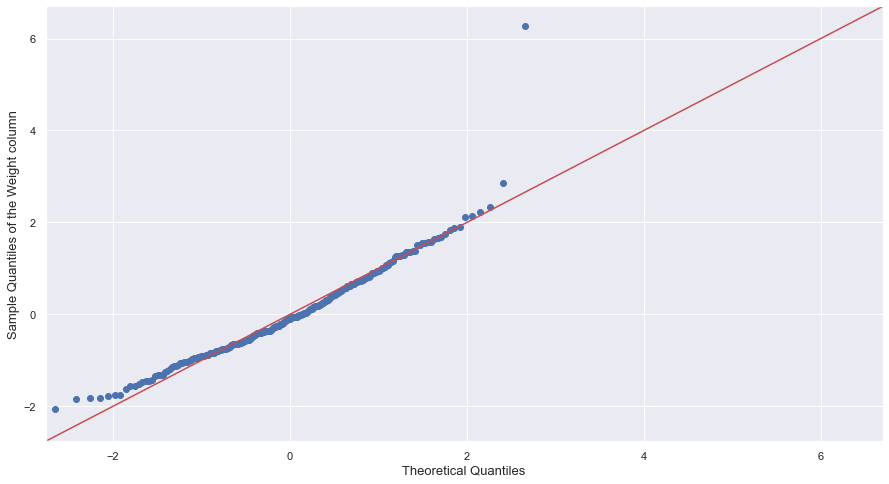

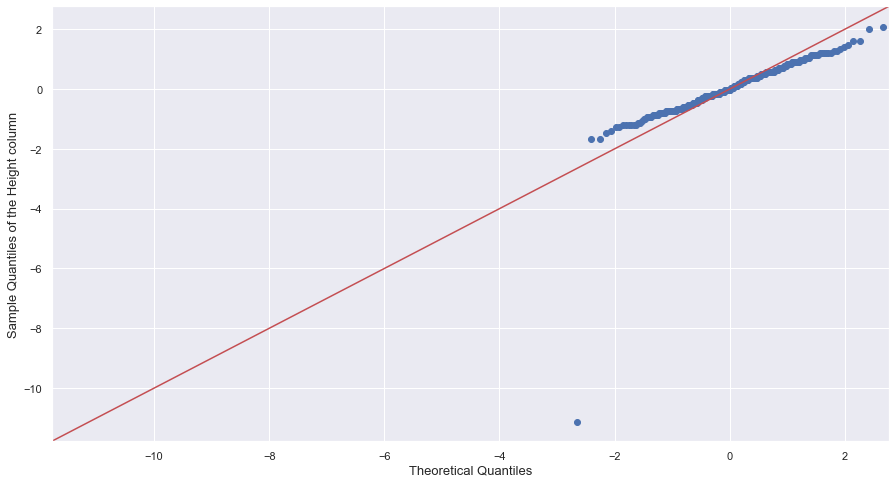

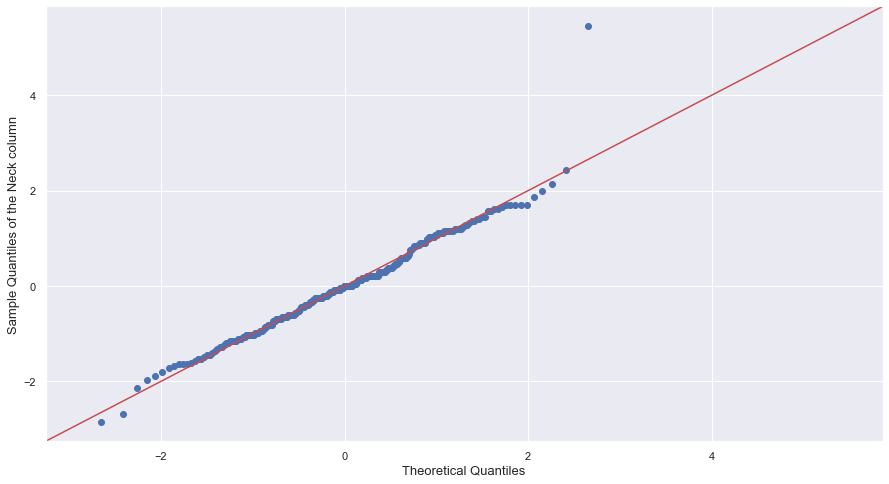

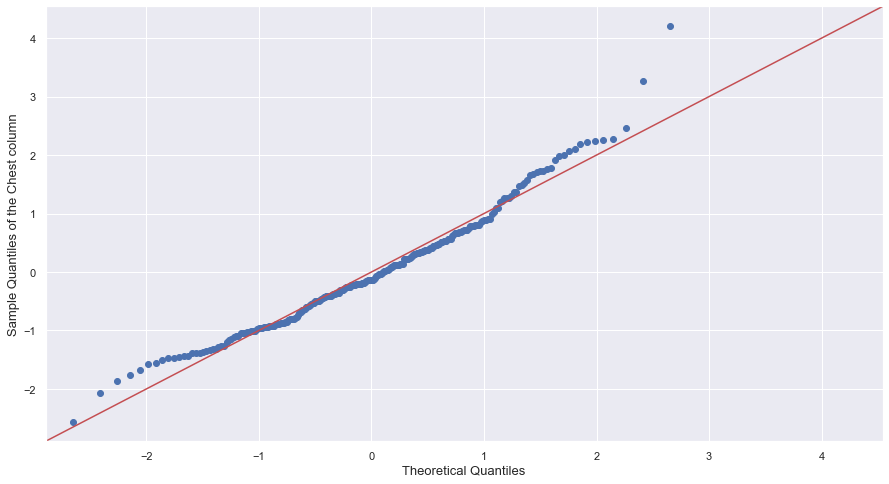

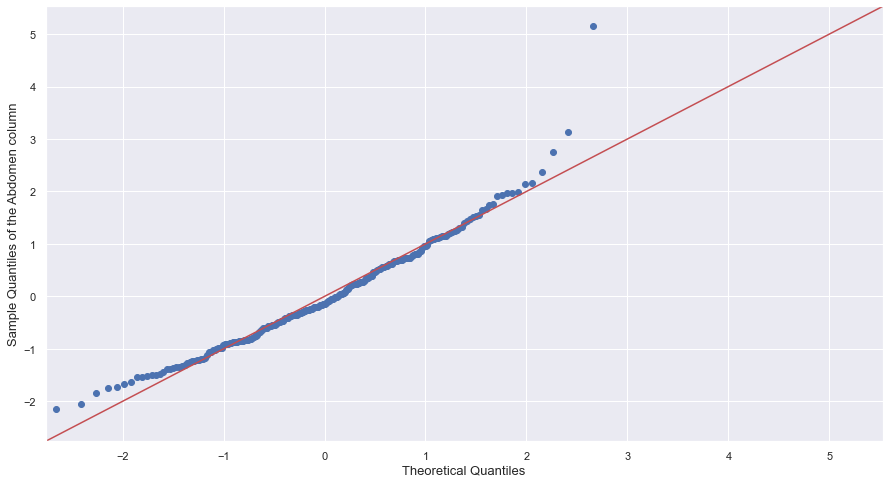

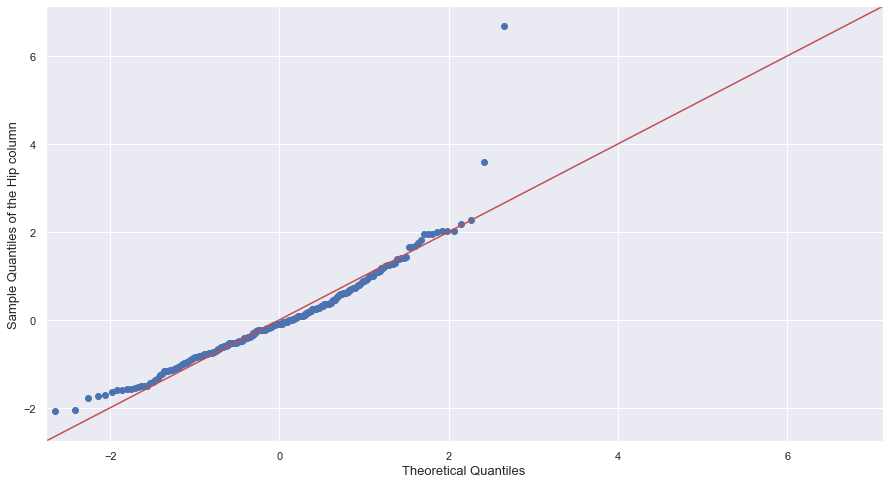

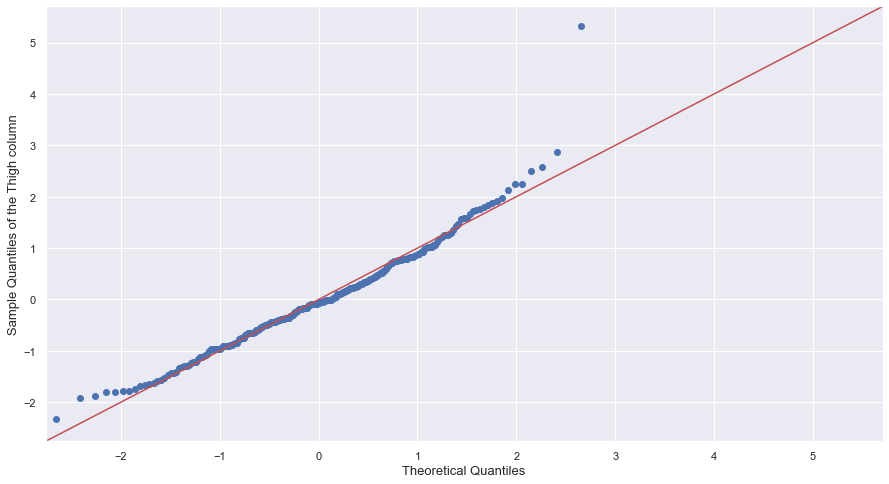

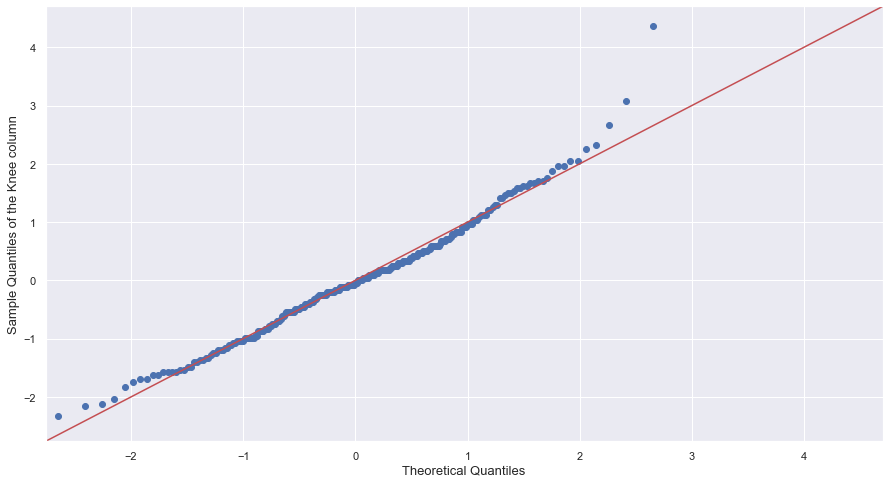

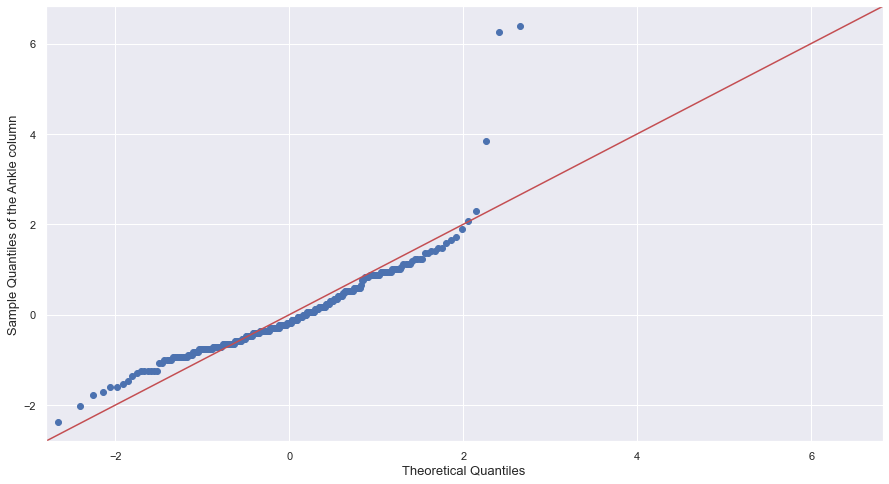

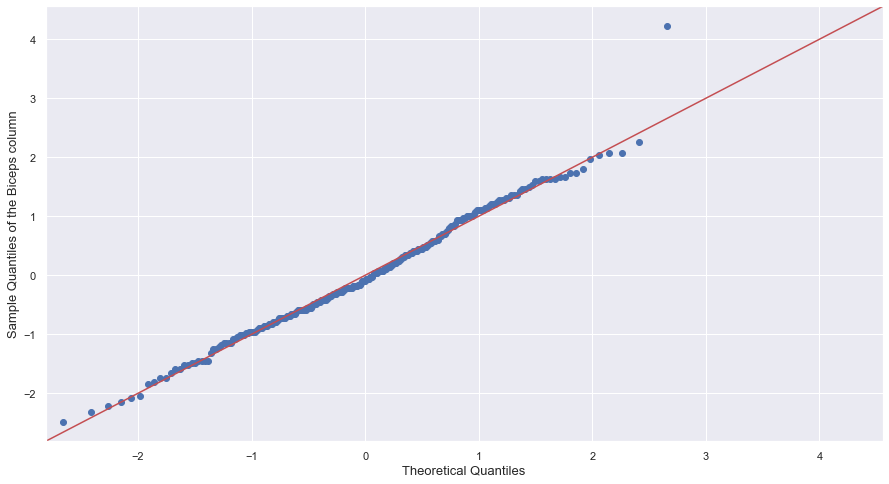

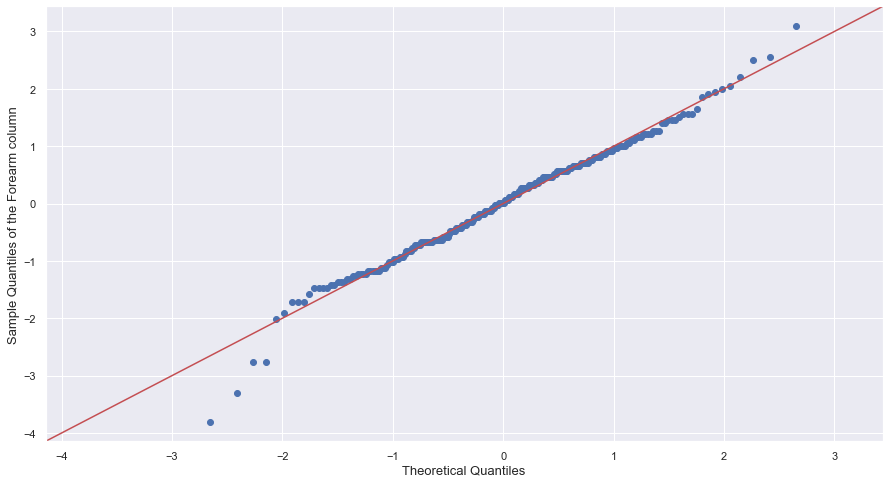

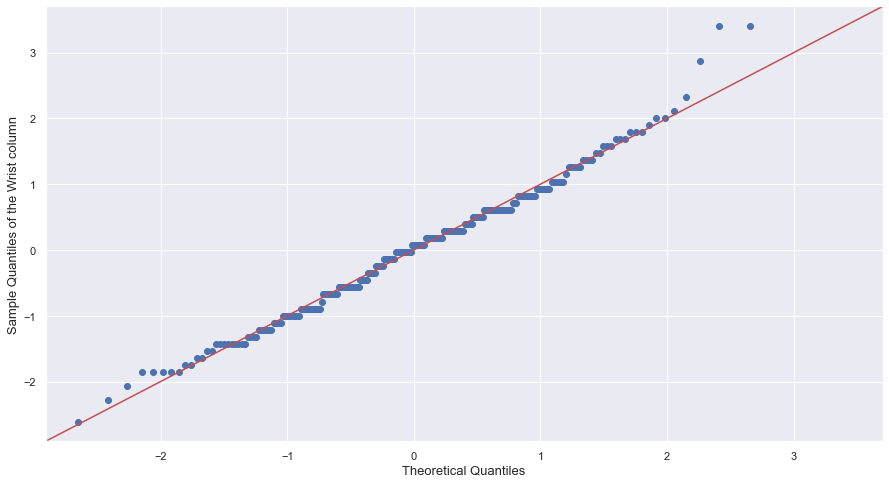

In [22]:
normality_visual(df)

#### The problem with dataset is that almost all features are correlated with one another which is natural because we're talking about bodily features. So if we were to build a model we'd have to apply conduct VIF to filter some columns.  

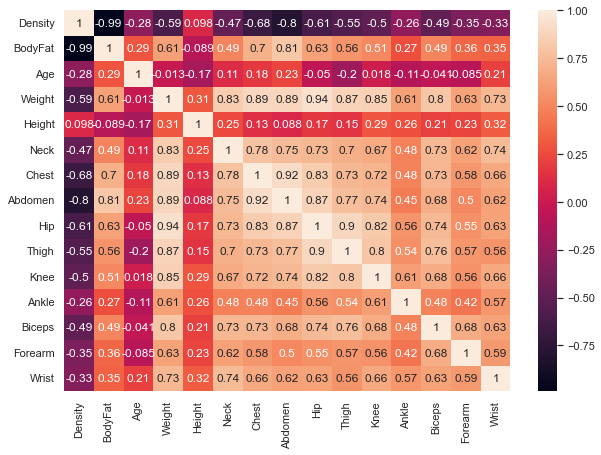

In [13]:
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(df.corr(), annot=True)
plt.show()